# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.
- Motivation Problem - Pizza Parlour Study
- Problem Statement Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.


# Implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# data set preparation

In [124]:
X,Y=make_blobs(n_samples=500,centers=5,n_features=2,random_state=4)

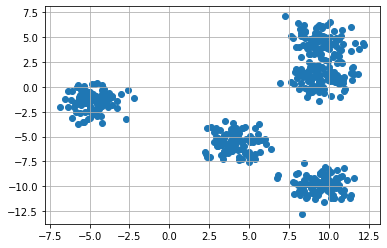

In [125]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [126]:
Y

array([4, 1, 1, 0, 3, 2, 2, 4, 2, 0, 2, 4, 0, 3, 0, 1, 2, 2, 4, 1, 1, 2,
       2, 3, 1, 2, 1, 3, 3, 1, 0, 1, 1, 0, 3, 4, 4, 0, 0, 0, 1, 4, 3, 1,
       3, 3, 1, 1, 2, 1, 0, 0, 3, 0, 1, 0, 1, 2, 0, 2, 3, 3, 2, 1, 3, 4,
       2, 1, 0, 2, 2, 4, 2, 0, 2, 2, 0, 2, 1, 4, 2, 4, 4, 0, 4, 3, 4, 4,
       3, 0, 2, 4, 0, 1, 1, 3, 2, 3, 3, 1, 4, 3, 3, 0, 4, 2, 3, 0, 4, 3,
       0, 0, 2, 4, 0, 1, 1, 0, 4, 4, 4, 3, 0, 3, 4, 1, 1, 0, 0, 4, 1, 3,
       3, 2, 4, 2, 4, 4, 2, 0, 1, 0, 1, 3, 3, 4, 1, 0, 3, 4, 2, 2, 2, 3,
       2, 4, 1, 4, 4, 1, 3, 2, 1, 0, 0, 3, 0, 3, 2, 3, 3, 2, 3, 0, 0, 4,
       4, 3, 3, 2, 4, 1, 3, 3, 1, 1, 1, 4, 0, 0, 0, 1, 3, 1, 4, 0, 4, 1,
       2, 4, 1, 4, 4, 1, 1, 2, 2, 1, 3, 0, 3, 3, 0, 0, 0, 2, 3, 3, 3, 1,
       2, 4, 2, 0, 4, 1, 4, 2, 2, 1, 1, 0, 2, 3, 3, 1, 1, 0, 1, 0, 4, 2,
       2, 1, 4, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 4, 2, 2, 0, 3, 0, 3,
       2, 1, 3, 1, 0, 4, 1, 0, 4, 4, 4, 3, 2, 4, 0, 4, 2, 0, 3, 0, 1, 4,
       2, 1, 4, 3, 2, 4, 3, 1, 2, 1, 2, 0, 2, 4, 1,

In [127]:
10*(2*np.random.random((X.shape[1],))-1)  # always gives number between -10 to 10

array([9.15104143, 8.14664518])

# step 1: allocating centre for each cluster at random points

In [128]:
k=5
clusters={}
color=['green','red','blue','yellow','orange']
for i in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    cluster={'color':color[i],'center':center,'points':[]}
    clusters[i]=cluster


# step 2: assigning all points to nearest cluster

# defining a helper function

In [129]:
def distance(x1,x2):
    return (np.sqrt(np.sum((x1-x2)**2)))

In [130]:
x1=np.array([1,2,3])
x2=np.array([4,5,6])
distance(x1,x2)

5.196152422706632

In [131]:
for i in range(k):
    print(clusters[i])

{'color': 'green', 'center': array([ 3.81075729, -8.67405955]), 'points': []}
{'color': 'red', 'center': array([ 6.09349846, -7.80893997]), 'points': []}
{'color': 'blue', 'center': array([3.22024621, 0.441141  ]), 'points': []}
{'color': 'yellow', 'center': array([ 9.35637325, -7.69185552]), 'points': []}
{'color': 'orange', 'center': array([-4.26447653,  1.05480611]), 'points': []}


# assign every data point to one of the clusters

In [135]:
# Assign every data point to one of the clusters
def assignpointtoclusters(clusters):   # E-stpe 
    for i in range(X.shape[0]):
        dist=[]
        for kx in range(k):
            dis=distance(X[i],clusters[kx]['center'])
            dist.append(dis)
        curr_clus=np.argmin(dist)
        #print(curr_clus)
        clusters[np.argmin(dist)]['points'].append(X[i])
def updateclusters(clusters):
    # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            clusters[kx]['center']=pts.mean(axis=0)  #updating center
            clusters[kx]['points']=[] #clear the list
def plotcluster(clusters):  # ploting the clusters and centres
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        #print(pts)
        #print(pts.shape)
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
            #for ploting of clusters
        except:
            pass
        #for ploting of centres
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

In [133]:
assignpointtoclusters(clusters)

(45, 2)
(55, 2)
(199, 2)
(101, 2)
(100, 2)


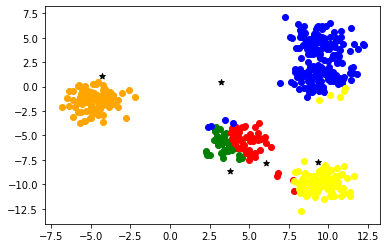

In [134]:
plotcluster(clusters)

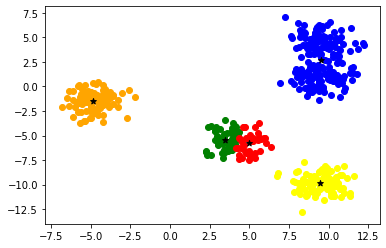

In [140]:
assignpointtoclusters(clusters)
plotcluster(clusters)
updateclusters(clusters)

# K-Means++
- K-Means is quite sensitive to initalization, if the init is not good, our algorithm is not able to make desired number of clusters.
- To overcome this problem, we use technique called K-Means++ (described in paper Robust Seed Selection for K-Means type of Algorithms) which chooses initial centers so that they are statiscallly close to final ones.

- The method is default choice for sklearn, so we will use it directly without going into much maths!

- Two different types of clustering oberserved for two different types of initialisations as discussed in the last example.

- Clustering - 1

- Clustering - 2Pizza-1

# Using Sci-kit Learn

In [144]:
from sklearn.cluster import KMeans

In [145]:
kmeans  = KMeans(n_clusters=5)

In [147]:
kmeans.fit(X,Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [148]:
centers = kmeans.cluster_centers_

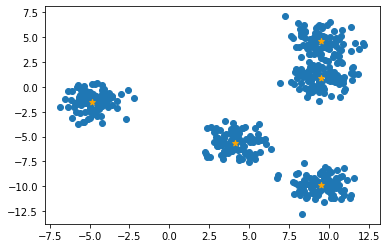

In [149]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='*',color='orange')
plt.show()


In [150]:
pred = kmeans.labels_

In [151]:
print(pred)

[2 1 1 4 0 3 3 2 3 4 3 2 4 0 4 1 3 3 2 1 1 3 3 0 1 3 1 0 0 1 4 1 1 4 0 2 2
 4 4 4 1 2 0 1 0 0 1 1 3 1 4 4 0 4 1 4 1 3 4 3 0 0 3 1 0 2 3 1 4 3 3 2 3 4
 3 3 4 3 1 2 3 2 2 4 2 0 2 2 0 4 3 2 4 1 1 0 3 0 0 1 2 0 0 4 2 3 0 4 2 0 4
 4 3 2 4 1 1 4 2 2 2 0 4 0 2 1 1 4 4 2 1 0 0 3 2 3 2 2 3 4 1 4 1 0 0 2 1 4
 0 2 3 3 3 0 3 2 1 2 2 1 0 3 4 4 4 0 4 0 3 0 0 3 0 4 4 2 2 0 0 3 2 1 0 0 1
 1 1 2 4 4 4 1 0 1 2 4 2 1 3 2 1 2 2 1 1 3 3 1 0 4 0 0 1 4 4 3 0 0 0 1 3 2
 3 4 2 1 2 3 3 1 1 4 3 0 0 1 1 4 1 4 2 3 3 1 2 3 3 4 1 3 4 1 3 4 3 3 3 2 3
 3 4 0 4 0 3 1 0 1 4 2 1 4 2 2 2 0 3 2 4 2 3 4 0 4 4 2 3 1 2 0 3 2 0 1 3 1
 3 4 3 2 1 2 2 2 3 0 1 4 1 2 0 2 3 4 1 0 1 2 4 4 4 1 1 0 0 1 3 2 4 0 4 0 3
 3 0 3 2 1 0 4 4 3 2 2 4 1 3 0 4 0 1 2 0 2 2 1 1 2 4 3 0 1 2 1 0 3 4 4 1 2
 2 2 1 3 3 2 0 0 2 2 3 1 4 4 0 2 2 4 0 3 0 0 3 0 3 2 1 2 2 3 4 0 0 0 1 3 2
 4 4 4 1 0 3 0 4 0 1 3 3 3 1 2 3 4 1 4 1 4 1 3 0 3 2 1 0 4 4 1 3 2 4 2 4 3
 4 2 4 0 0 0 0 2 4 2 0 3 2 1 4 0 0 0 1 4 4 1 4 1 3 3 2 4 2 2 0 3 2 2 4 4 0
 0 0 3 3 3 2 4 4 4 3 1 3 

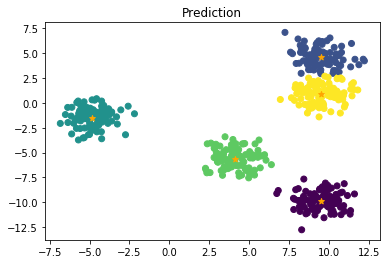

In [154]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='orange')
plt.title("Prediction")
plt.show()

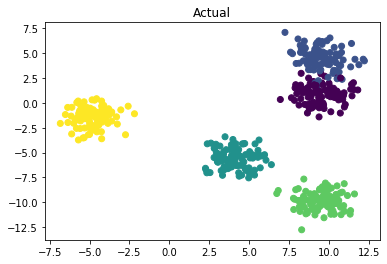

In [155]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title("Actual")
plt.show()

# Problem with K-Means
- Can fail sometimes on complex datasets

In [156]:
from sklearn.datasets import make_circles,make_moons

In [157]:
X1,Y1 = make_moons(n_samples=200,noise=0.10)

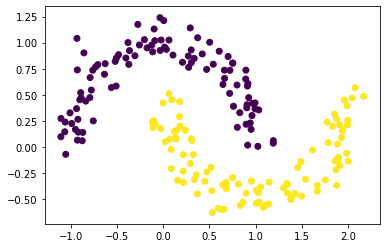

In [158]:
plt.scatter(X1[:,0],X1[:,1],c=Y1)
plt.show()

In [162]:
km = KMeans(n_clusters=2)
km.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

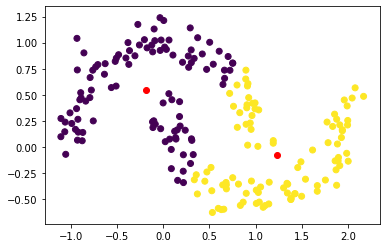

In [163]:
centers = km.cluster_centers_
label = km.labels_

plt.scatter(X1[:,0],X1[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color='red')
plt.show()

# DBSCAN
- Density Based Spatial Clustering of Applications with Noise
- Based upon on the idea, that a cluster is a high density area surrounded by low density region
- Starts by exploring a small area, if density is "good enough" it considered as part of cluster, and explores neigbours and so on, so it groups regions based upon density!

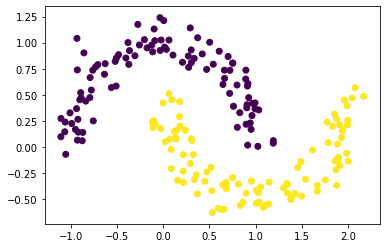

In [164]:
plt.scatter(X1[:,0],X1[:,1],c=Y1)
plt.show()


In [165]:
from sklearn.cluster import DBSCAN

In [166]:
dbs = DBSCAN

In [167]:
dbs = DBSCAN(eps=0.21,min_samples=5)

In [168]:
dbs.fit(X1)

DBSCAN(algorithm='auto', eps=0.21, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [172]:
Ypred = dbs.fit_predict(X1)

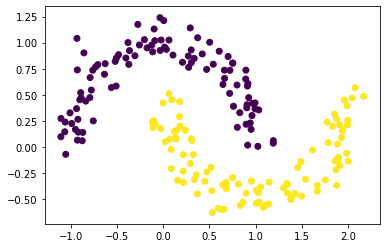

In [174]:
plt.scatter(X1[:,0],X1[:,1],c=Ypred)
plt.show()